### H1 - Main character by speech amount

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

In [62]:
clean_data_folder = "../clean_data"

In [63]:
##brought together as method
def propose_main_characters(season, number_of_episodes):
    df= pd.read_csv("../clean_data/csv/S"+str(season)+"-E1-clean.csv",
                    names=["character","text"], header=0)
    episode=2
    while episode <=number_of_episodes:
        file= "../clean_data/csv/S"+str(season)+"-E"+str(episode)+"-clean.csv"
        try:
            temp_df = pd.read_csv(file, names=["character","text"], header=0)
            df=df.append(temp_df)
            episode= episode+1
            #print(temp_df.shape)
        except:
            episode= episode+1
    df=df.reset_index(drop=True)
    #-- Add column with word count 
    words = df.text
    df['word_count'] = words.apply(lambda x: len(x.split()))
    # characters sorted by total word count
    total_word_count_per_character=df[['character', 'word_count']].groupby(
        'character').sum().sort_values(by='word_count', 
                                       ascending=False).reset_index()
    #identify main characters
    #rule: charaters are ranked (most words #1) 
        #-> if character word count is less than 60% of the 
    #previous character, the following characters are considered side characters
    ##several different ideas to find "red line"
        #-60%
        #- average number of main characters
        # - everyone with >=7000 words is a main character
    main_characters_percent_rule=[]
    main_characters_fixed_number_of_main_characters=[]
    main_characters_fixed_number_of_min_words=[]
    main_characters_combined_approach=[]
    rows= df.shape[0]
    #60% rule:
    index =0
    while index<rows:
        if index!=0:
            current_character=total_word_count_per_character.word_count[index]
            prev_character=total_word_count_per_character.word_count[index-1]
            percent= current_character*100/prev_character
            if percent<60:
                break
            else:
                main_characters_percent_rule.append(
                    total_word_count_per_character.character[index])
        else:
            main_characters_percent_rule.append(
                total_word_count_per_character.character[index])
        index=index+1
    
    #top 5 are main characters
    index =0
    while index<5:
        main_characters_fixed_number_of_main_characters.append(
            total_word_count_per_character.character[index])
        index=index+1
    
    #everyone with >=7000 words is a main character
    index =0
    while index<rows:
        if index!=0:
            if total_word_count_per_character.word_count[index]<7000:
                break
            else:
                main_characters_fixed_number_of_min_words.append(
                    total_word_count_per_character.character[index])
        else:
            main_characters_fixed_number_of_min_words.append(
                total_word_count_per_character.character[index])
        index=index+1
        
    #combine aproach 1 and 2:
    index =0
    while index<5:
        if index!=0:
            current_character=total_word_count_per_character.word_count[index]
            prev_character=total_word_count_per_character.word_count[index-1]
            percent= current_character*100/prev_character
            if percent<60:
                break
            else:
                main_characters_combined_approach.append(
                    total_word_count_per_character.character[index])
        else:
            main_characters_combined_approach.append(
                total_word_count_per_character.character[index])
        index=index+1
    return main_characters_percent_rule, main_characters_fixed_number_of_main_characters, main_characters_fixed_number_of_min_words,main_characters_combined_approach, total_word_count_per_character

In [64]:
# all seasons in comparison:
asumption1, asumption2 ,asumption3, asumption4, result_df=propose_main_characters(1,30)
data = [[1, "60% rule:", asumption1, len(asumption1)],
        [1,"top 5 are main characters", asumption2, len(asumption2)],
        [1,"everyone with >=7000 words is a main character", 
         asumption3, len(asumption3)],
       [1, "combined 1+2", asumption4, len(asumption4)]]
result= pd.DataFrame(data, columns = ['season','approach', 
                                      'Assumed main characters',
                                      'Number of main characters proposed'])

season =2
while season<10:
    asumption1, asumption2 ,asumption3, asumption4, result_df=propose_main_characters(
        season,30)
    data = [[season, "60% rule:", asumption1, len(asumption1)],
            [season,"top 5 are main characters", asumption2, len(asumption2)],
            [season,"everyone with >=7000 words is a main character", 
             asumption3, len(asumption3)],
            [season, "combined 1+2", asumption4, len(asumption4)]]
    temp= pd.DataFrame(data, columns = ['season','approach', 'Assumed main characters',
                                        'Number of main characters proposed'])

    result=result.append(temp)
    season=season+1

result=result.reset_index(drop=True)
pd.set_option('display.max_colwidth', None)
result

,season,approach,Assumed main characters,Number of main characters proposed
0,1,60% rule:,"[jack_o_neill, daniel_jackson, samantha_carter]",3
1,1,top 5 are main characters,"[jack_o_neill, daniel_jackson, samantha_carter, hammond, teal_c]",5
2,1,everyone with >=7000 words is a main character,"[jack_o_neill, daniel_jackson, samantha_carter]",3
3,1,combined 1+2,"[jack_o_neill, daniel_jackson, samantha_carter]",3
4,2,60% rule:,"[samantha_carter, jack_o_neill, daniel_jackson, hammond, teal_c]",5
5,2,top 5 are main characters,"[samantha_carter, jack_o_neill, daniel_jackson, hammond, teal_c]",5
6,2,everyone with >=7000 words is a main character,"[samantha_carter, jack_o_neill, daniel_jackson, hammond]",4
7,2,combined 1+2,"[samantha_carter, jack_o_neill, daniel_jackson, hammond, teal_c]",5
8,3,60% rule:,"[jack_o_neill, daniel_jackson, samantha_carter]",3
9,3,top 5 are main characters,"[jack_o_neill, daniel_jackson, samantha_carter, teal_c, hammond]",5


Text(0.5, 0, 'Number of proposed main charaters')

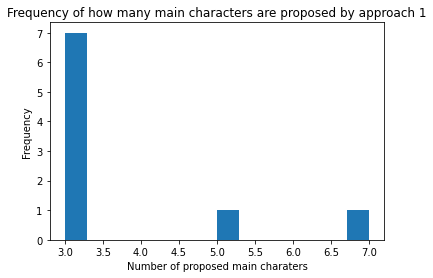

In [65]:
approach1["Number of main characters proposed"].plot.hist(
    bins=14,
    title="Frequency of how many main characters are proposed by approach 1").set_xlabel(
    "Number of proposed main charaters")

Text(0.5, 0, 'Number of proposed main charaters')

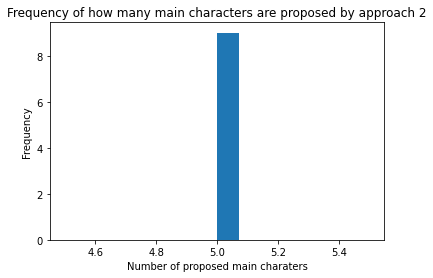

In [66]:
approach2["Number of main characters proposed"].plot.hist(
    bins=14, 
    title="Frequency of how many main characters are proposed by approach 2").set_xlabel(
    "Number of proposed main charaters")

Text(0.5, 0, 'Number of proposed main charaters')

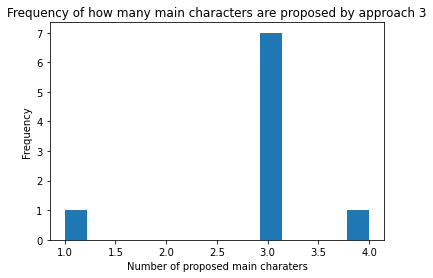

In [67]:
approach3["Number of main characters proposed"].plot.hist(
    bins=14, 
    title="Frequency of how many main characters are proposed by approach 3").set_xlabel(
    "Number of proposed main charaters")

Text(0.5, 0, 'Number of proposed main charaters')

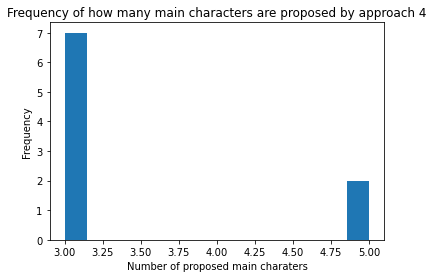

In [68]:
approach4["Number of main characters proposed"].plot.hist(
    bins=14, 
    title="Frequency of how many main characters are proposed by approach 4").set_xlabel(
    "Number of proposed main charaters")

In [69]:
sum_characters= allapproches["Number of main characters proposed"].sum()
average = sum_characters/allapproches.shape[0]
average

3.75